In [85]:
%pip install tensorflow keras

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [86]:
from keras.api.datasets import mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [87]:
x_train_normalized = x_train / 255.0

In [88]:
import numpy as np
random_index = np.random.choice(x_train.shape[0], 10000)
x_train = x_train_normalized[random_index]
y_train = y_train[random_index]
x_train.shape

(10000, 28, 28)

In [89]:
from keras.api.models import Sequential
from keras.api.layers import Flatten, Input, Dense

model = Sequential([
    Input((28, 28)),
    Flatten(),
    Dense(128, activation="relu"),
    Dense(32, activation="relu"),
    Dense(10, activation="softmax")
])

In [97]:
import keras
'''
model.compile(
    optimizer="adam",
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"]
)
'''
model.compile(
    optimizer=keras.optimizers.Adam(),
    loss=keras.losses.SparseCategoricalCrossentropy(),
    metrics=["accuracy"],
)
model.summary()

Model: "sequential_12"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_12 (Flatten)            │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_36 (Dense)                │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_37 (Dense)                │ (None, 32)             │         4,128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_38 (Dense)                │ (None, 10)             │           330 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 104,938 (409.91 KB)

 Trainable params: 104,938 (409.91 KB)

 Non-trainable params: 0 (0.00 B)

In [109]:
history = model.fit(
    x_train, y_train,
    validation_split=0.2, batch_size=16, epochs=30, verbose=1
)

Epoch 1/30
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9939 - loss: 0.0160 - val_accuracy: 0.9540 - val_loss: 0.1803
Epoch 2/30
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9975 - loss: 0.0062 - val_accuracy: 0.9620 - val_loss: 0.1580
Epoch 3/30
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 1.0000 - loss: 0.0010 - val_accuracy: 0.9610 - val_loss: 0.1584
Epoch 4/30
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 1.0000 - loss: 5.6233e-04 - val_accuracy: 0.9615 - val_loss: 0.1617
Epoch 5/30
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 1.0000 - loss: 4.6797e-04 - val_accuracy: 0.9625 - val_loss: 0.1643
Epoch 6/30
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 1.0000 - loss: 2.8274e-04 - val_accuracy: 0.9610 - val_loss: 0.1669
Epoch 7/30
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 1.0000 - loss: 2.5683e-04 - val_accuracy: 0.9625 - val_loss: 0.1724
Epoch 8/30
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 1.0000 - loss: 2.0010e-0

In [110]:
x_test_normalized = x_test / 255.0
test_loss, test_accuracy = model.evaluate(x_test, y_test)
print(test_loss, test_accuracy)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9484 - loss: 61.6392
53.69526290893555 0.9542999863624573


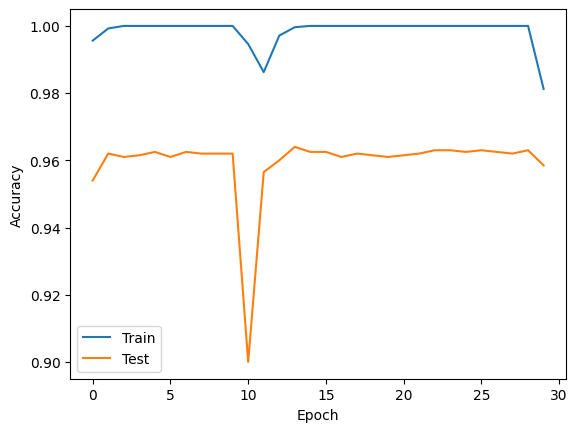

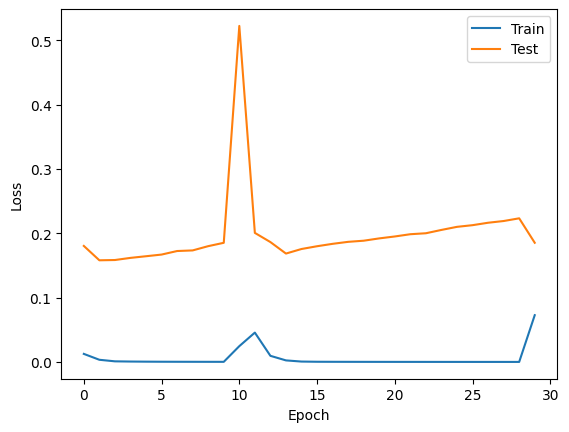

In [111]:
import matplotlib.pyplot as plt
plt.plot(history.history["accuracy"])
plt.plot(history.history["val_accuracy"])
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.legend(["Train", "Test"])
plt.show()
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])
plt.ylabel("Loss")
plt.xlabel("Epoch")
plt.legend(["Train", "Test"])
plt.show()

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 885us/step


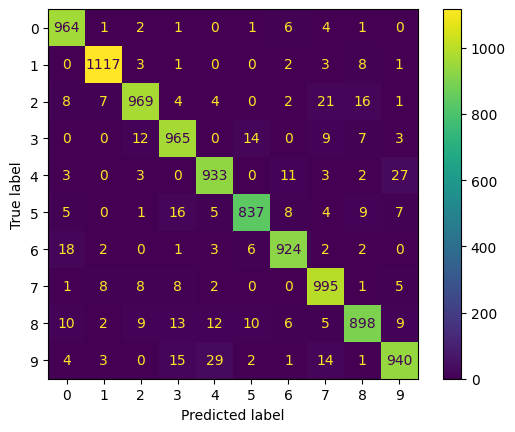

In [112]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
y_predicted = model.predict(x_test_normalized)
y_predicted_classes = y_predicted.argmax(axis=1)
cm = confusion_matrix(y_test, y_predicted_classes)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

In [ ]:
from keras.api.utils import plot_model

plot_model(model, show_shapes=True, show_layer_names=True, dpi=70)